<a href="https://colab.research.google.com/github/ananyabhopatrao/ML-Model/blob/main/Accident_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load & Explore the Dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Accident_Information.csv")

<ipython-input-71-9f8cf03bbe97>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Accident_Information.csv")


In [ ]:
# Display basic information
print(df.head())   # Show first few rows

  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  2005-01-04   
1              0.0            Slight                 NaN  2005-01-05   
2              0.0            Slight                 NaN  2005-01-06   
3              0.0            Slight                 NaN  2005-01-07   
4              0.0            Slight                 NaN  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                 

In [ ]:
print(df.info())   # Column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [ ]:
print(df.isnull().sum())  # Check for missing values

Accident_Index                                       0
1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Accident_Severity                                    0
Carriageway_Hazards                            2007807
Date                                                 0
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                           174
Light_Conditions                                     0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Longitude 

**Data Cleaning & Preprocessing**

1-Handle Missing Values

In [ ]:
# Drop columns with too many missing values (if necessary)
df.dropna(inplace=True)

In [ ]:
# Alternatively, fill missing values (if relevant)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

<ipython-input-51-2ca3c0eef8db>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [ ]:
print(df.isnull().sum())  # Recheck missing values

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

2-Convert Categorical Data into Numerical

In [ ]:
# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['Weather_Conditions', 'Road_Type', 'Light_Conditions'], drop_first=True)

3-Normalize Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Speed_limit', 'Latitude', 'Longitude']] = scaler.fit_transform(df[['Speed_limit', 'Latitude', 'Longitude']])

**Split Data for Training & Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Accident_Severity'])  # Replace with actual target column
y = df['Accident_Severity']

In [ ]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (1156, 47), Testing data: (289, 47)


**Train the Machine Learning Model**

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
print(X_train.dtypes)

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
LSOA_of_Accident_Location                       object
Number_of_

In [ ]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8512110726643599
Classification Report:
               precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00         6
     Serious       0.25      0.03      0.05        35
      Slight       0.86      0.99      0.92       248

    accuracy                           0.85       289
   macro avg       0.37      0.34      0.32       289
weighted avg       0.77      0.85      0.80       289



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Optimize the Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


**Visualizations**

*Accident Severity Distribution*

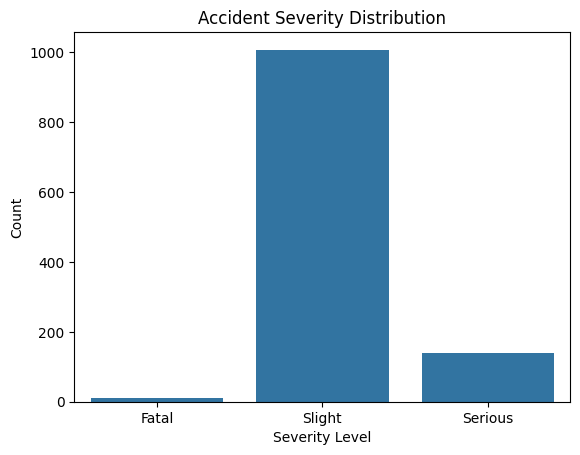

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)  # Assuming 'y_train' contains severity labels
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

*Time vs. Accident Count*

<ipython-input-68-0dcb71afc9fc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


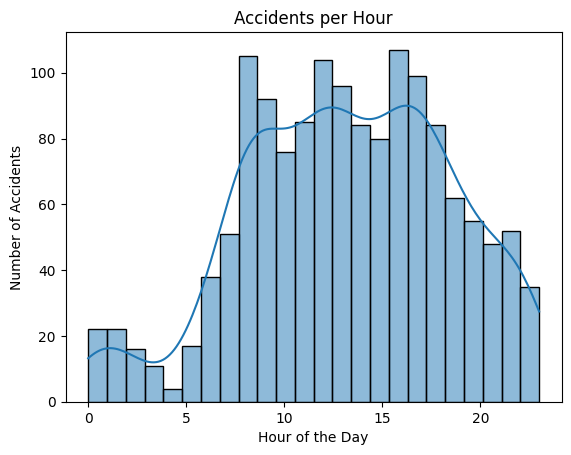

In [ ]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.show()

**Make Predictions on New Data**

In [ ]:
new_data = [[30, 52.1, -0.1, 1, 0, 1, 2, 0, 3, 1, -1, 4, 0]]
prediction = model.predict(new_data)
print("Predicted Accident Severity:", prediction)

Predicted Accident Severity: ['Slight']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


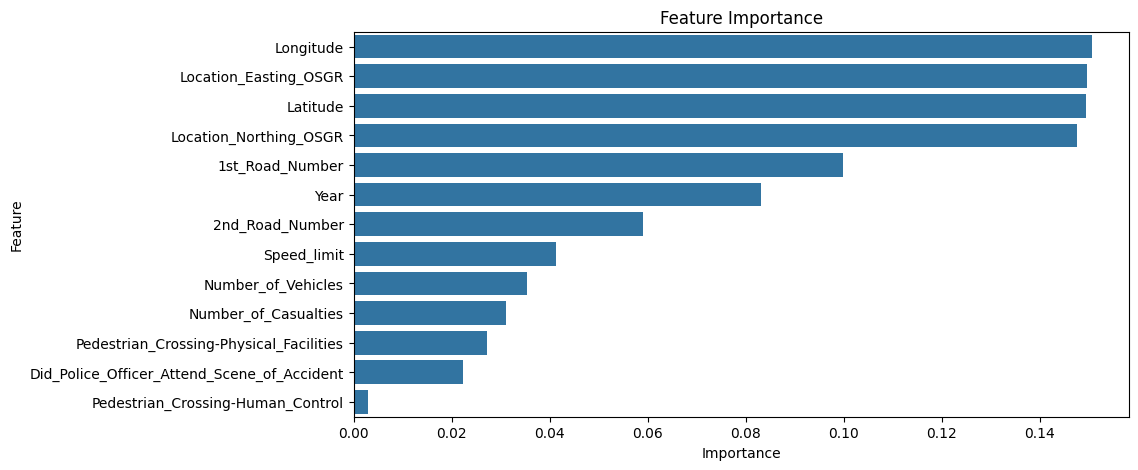

In [ ]:
import pandas as pd
import seaborn as sns

feature_importances = model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importance')
plt.show()